# Avance 1. Análisis exploratorio de datos


Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad.

## Introducción
### Contexto y Objetivos del Análisis
#### Descripción del problema de negocio o investigación.
En un mundo donde los trastornos mentales afectan a millones de personas, la depresión se ha convertido en una de las principales causas de sufrimiento humano y discapacidad. México no es la excepción: la prevalencia de este padecimiento ha alcanzado niveles críticos, revelando una realidad inquietante. A pesar de la creciente necesidad de atención especializada, persiste una alarmante brecha entre quienes requieren un diagnóstico oportuno y quienes realmente acceden a servicios de salud mental. Esta desconexión no solo compromete la calidad de vida de los individuos, sino que también representa un desafío urgente para los sistemas de salud, tanto a nivel nacional como global. Reconocer esta problemática es el primer paso hacia soluciones efectivas y humanamente necesarias.
Es por esto que se busca el desarrollo de un sistema avanzado de análisis y pronóstico epidemiológico de depresión en México a nivel estatañ y nacional con intervalos de predicción confiables, utilizando modelos de machine learning aplicados a series de tiempo a partir del Boletín Epidemiológico de la Secretaría de Salud, que faciliten la planeación estratégica y la asignación eficiente de recursos en el Sistema Nacional de Salud.
#### Preguntas a responder con el análisis EDA
- ¿Cómo se comporta la serie de tiempo en su estado actual?
- ¿Existen fechas faltantes al comparar la serie con un rango completo de fechas semanales?
- ¿Qué observaciones se consideran atípicas al aplicar ventanas móviles?
- ¿Cómo se distribuyen los datos por mes y por año?
- ¿Qué diferencias se observan en la dispersión mensual o anual mediante boxplots?
- ¿Cómo varía la serie según otras variables relevantes como el estado?
- ¿Cuál es la tendencia subyacente de la serie?d
- ¿La serie cumple con los criterios de estacionaridad según la pru




## Descripción del Conjunto de Datos
#### Origen y descripción de los datos.
Extracción del Boletín Epidemiológico de la Secretaría de Salud. Casos por Entidad Federativa de Enfermedades Neurológicas y de Salud Mental. Codificación: CIE-10 para diagnósticos.
* Depresión CIE-10ª REV.F32
* Enfermedad de Parkinson CIE-10ª REV. G20
* Enfermedad de Alzheimer CIE-10ª REV. G30

Estratificación:
* Sexo (H-M)
* Entidad Federativa  
* Posible inclusión de variables exógenas
* Posible combinación con Cubos Dinámicos.

#### Significado de cada variable.
* Año: año de diagnóstico
* Semana: semana epidemiológica del año de diagnóstico
* Pag.: página en boletín
*	Cuadro: cuadro de diagnóstico
*	No_01: columna vacía
*	Entidad: entidad donde se encuentra caso diagnosticado
* No_02: columna vacía
*	Padecimiento: diagnpostico de enfermedad
*	Ax_001: año de diagnóstico (actual o acumulado)
*	Ax_002: indicativo de valor acumulado
*	Ax_003: indicativo de valor semanal, casos masculinos, femeninos o acumulados
*	No_03: columna vacía
*	Valor: conteo de casos según indicativo
*	No_04: columna vacía

#### Granularidad temporal
221,398 Registros en periodo 2014-2024, con cifras por semana epidemiológica y acumuladas.

### Librerías y Carga de Datos

#### Librerías

In [1]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


#### Carga de Datos

In [2]:
path = '../../data/raw/data.parquet'
df = pd.read_parquet(path)
df.head()

,Año,Semana,Pag.,Cuadro,No_01,Entidad,No_02,Padecimiento,Ax_001,Ax_002,Ax_003,No_03,Valor,No_04
0,2014,sem02,57,CUADRO 17.,NaN,Aguascalientes,NaN,DepresiónCIE-10ª REV.F32,2014,0,Sem.,NaN,1,NaN
1,2014,sem02,57,CUADRO 17.,NaN,Aguascalientes,NaN,DepresiónCIE-10ª REV.F32,2014,Acum.,H,NaN,1,NaN
2,2014,sem02,57,CUADRO 17.,NaN,Aguascalientes,NaN,DepresiónCIE-10ª REV.F32,2014,Acum.,M,NaN,-,NaN
3,2014,sem02,57,CUADRO 17.,NaN,Aguascalientes,NaN,Enfermedad de Parkinson\nCIE-10ª REV.\nG20,2014,0,Sem.,NaN,-,NaN
4,2014,sem02,57,CUADRO 17.,NaN,Aguascalientes,NaN,Enfermedad de Parkinson\nCIE-10ª REV.\nG20,2014,Acum.,H,NaN,-,NaN


## Limpieza e Inspección Inicial de **Datos**

### Análisis de los Datos

En esta sección realizaremos un análisis exploratorio inicial para entender la estructura y características de nuestro dataset. Examinaremos:

- **Dimensiones del dataset**: Número de filas y columnas

In [3]:
print('Dimensiones del DataFrame:', df.shape)
print(f'Total de registros: {df.shape[0]:,}')
print(f'Total de columnas: {df.shape[1]}')

Dimensiones del DataFrame: (329637, 14)
Total de registros: 329,637
Total de columnas: 14


- **Valores faltantes**: Identificación de datos ausentes por columna

In [4]:
print('\nValores faltantes por columna:')
print(tabulate(df.isnull().sum().reset_index(),
               headers=['Columna', 'Valores faltantes'],
               tablefmt='rounded_outline',
               showindex=False))


Valores faltantes por columna:
╭──────────────┬─────────────────────╮
│ Columna      │   Valores faltantes │
├──────────────┼─────────────────────┤
│ Año          │                   0 │
│ Semana       │                   0 │
│ Pag.         │                   0 │
│ Cuadro       │                   0 │
│ No_01        │              329637 │
│ Entidad      │                   0 │
│ No_02        │              329637 │
│ Padecimiento │                   0 │
│ Ax_001       │                   0 │
│ Ax_002       │                   0 │
│ Ax_003       │                   0 │
│ No_03        │              329637 │
│ Valor        │                   0 │
│ No_04        │              329637 │
╰──────────────┴─────────────────────╯


- **Tipos de datos**: Verificación de tipos de variables (numéricas, categóricas, fechas)

In [5]:
print('\nTipos de datos por columna:')
print(tabulate(df.dtypes.reset_index(),
               headers=['Columna', 'Tipo de dato'],
               tablefmt='rounded_outline',
               showindex=False))


Tipos de datos por columna:
╭──────────────┬────────────────╮
│ Columna      │ Tipo de dato   │
├──────────────┼────────────────┤
│ Año          │ int64          │
│ Semana       │ object         │
│ Pag.         │ int64          │
│ Cuadro       │ object         │
│ No_01        │ float64        │
│ Entidad      │ object         │
│ No_02        │ float64        │
│ Padecimiento │ object         │
│ Ax_001       │ int64          │
│ Ax_002       │ object         │
│ Ax_003       │ object         │
│ No_03        │ float64        │
│ Valor        │ object         │
│ No_04        │ float64        │
╰──────────────┴────────────────╯


- **Valores únicos**: Cardinalidad de cada variable para detectar posibles problemas

In [6]:
print('\nValores únicos por columna:')
print(tabulate(df.nunique().reset_index(),
               headers=['Columna', 'Valores únicos'],
               tablefmt='rounded_outline',
               showindex=False))


Valores únicos por columna:
╭──────────────┬──────────────────╮
│ Columna      │   Valores únicos │
├──────────────┼──────────────────┤
│ Año          │               11 │
│ Semana       │               53 │
│ Pag.         │               26 │
│ Cuadro       │                4 │
│ No_01        │                0 │
│ Entidad      │               34 │
│ No_02        │                0 │
│ Padecimiento │               18 │
│ Ax_001       │               12 │
│ Ax_002       │                3 │
│ Ax_003       │                4 │
│ No_03        │                0 │
│ Valor        │             7740 │
│ No_04        │                0 │
╰──────────────┴──────────────────╯


- **Limpieza inicial**: Renombrado de columnas para mejorar la legibilidad

In [7]:
new_columns = {'Cuadro ': 'Cuadro', 'Entidad': 'Estado'}
df.rename(columns=new_columns, inplace=True)

Este análisis nos permite identificar operaciones de preprocesamiento necesarias antes del análisis más profundo.

### Preprocesamiento

Basándose en el análisis inicial, aplicaremos las siguientes transformaciones a los datos:

**1. Procesamiento de la columna 'Semana'**
- Remover el prefijo 'sem' de los valores
- Convertir a tipo entero para facilitar cálculos temporales

In [8]:
df['Semana'] = df['Semana'].str.replace('sem', '').astype('int')

**2. Creación de columna 'Fecha'**
- Generar fechas utilizando año y semana ISO
- Formato: Año + Semana + día 1 (lunes de cada semana)
- Facilita análisis de series temporales

In [9]:
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + df['Semana'].astype(str) + '1', format='%G%V%u')

**3. Limpieza de la columna 'Valor'**
- Eliminar caracteres no numéricos usando regex
- Convertir a tipo numérico, reemplazando valores inválidos con 0
- Asegurar consistencia en los datos de análisis

In [10]:
# df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce').fillna(0).astype(int)
df['Valor'] = pd.to_numeric(df['Valor'].str.replace(r'[^0-9]', '', regex=True), errors='coerce').fillna(0).astype(int)

**4. Procesamiento de 'Padecimiento'**
- Eliminar saltos de línea que pueden causar problemas
- Extraer códigos de padecimiento (formato REV.X) para análisis

In [11]:
df['Padecimiento'] = df['Padecimiento'].astype(str).str.replace('\n', '')
df['Codigo Padecimiento'] = df['Padecimiento'].str.extract(r'REV\.(.*)')

**5. Eliminación de columnas innecesarias**
- Remover columnas que inician con 'No' (columnas vacías)
- Eliminar columna 'Pag.' que no aporta valor analítico

In [12]:
# Eliminar las columnas que tengan el prefijo "No" (Columnas Vacías)
df = df.loc[:, ~df.columns.str.startswith('No')]
# Eliminar la columna Pag.
df.drop(columns='Pag.', inplace=True)

In [13]:
df.head(5)

,Año,Semana,Cuadro,Estado,Padecimiento,Ax_001,Ax_002,Ax_003,Valor,Fecha,Codigo Padecimiento
0,2014,2,CUADRO 17.,Aguascalientes,DepresiónCIE-10ª REV.F32,2014,0,Sem.,1,2014-01-06,F32
1,2014,2,CUADRO 17.,Aguascalientes,DepresiónCIE-10ª REV.F32,2014,Acum.,H,1,2014-01-06,F32
2,2014,2,CUADRO 17.,Aguascalientes,DepresiónCIE-10ª REV.F32,2014,Acum.,M,0,2014-01-06,F32
3,2014,2,CUADRO 17.,Aguascalientes,Enfermedad de ParkinsonCIE-10ª REV.G20,2014,0,Sem.,0,2014-01-06,G20
4,2014,2,CUADRO 17.,Aguascalientes,Enfermedad de ParkinsonCIE-10ª REV.G20,2014,Acum.,H,0,2014-01-06,G20


## Inspección Profunda de Datos

En esta sección realizaremos un análisis exhaustivo para detectar y cuantificar datos faltantes en las series temporales del dataset.

### Análisis de Datos de la Serie Completa por Combinación

**1. Detección de combinaciones únicas respecto a las columnas** `Cuadro`, `Estado`, `Codigo Padecimiento` y `Ax_003`

In [14]:
columnas_grupo = ['Cuadro', 'Estado', 'Codigo Padecimiento', 'Ax_003']
combinaciones_unicas = df[columnas_grupo].drop_duplicates()
print(f'Total de combinaciones únicas: {len(combinaciones_unicas):}')
print('Primeras 10 combinaciones únicas:')
print(tabulate(combinaciones_unicas.head(10), headers='keys', tablefmt='rounded_outline',showindex=False))


Total de combinaciones únicas: 1464
Primeras 10 combinaciones únicas:
╭────────────┬─────────────────┬───────────────────────┬──────────╮
│ Cuadro     │ Estado          │ Codigo Padecimiento   │ Ax_003   │
├────────────┼─────────────────┼───────────────────────┼──────────┤
│ CUADRO 17. │ Aguascalientes  │ F32                   │ Sem.     │
│ CUADRO 17. │ Aguascalientes  │ F32                   │ H        │
│ CUADRO 17. │ Aguascalientes  │ F32                   │ M        │
│ CUADRO 17. │ Aguascalientes  │ G20                   │ Sem.     │
│ CUADRO 17. │ Aguascalientes  │ G20                   │ H        │
│ CUADRO 17. │ Aguascalientes  │ G20                   │ M        │
│ CUADRO 17. │ Aguascalientes  │ G30                   │ Sem.     │
│ CUADRO 17. │ Aguascalientes  │ G30                   │ H        │
│ CUADRO 17. │ Aguascalientes  │ G30                   │ M        │
│ CUADRO 17. │ Baja California │ F32                   │ Sem.     │
╰────────────┴─────────────────┴──────────────

**2. Definición del rango temporal completo**:
- Rango de fechas desde la fecha mínima hasta la máxima del dataset
- Cantidad de fechas a existir por combinación

In [15]:
fecha_inicial = df['Fecha'].min()
fecha_final = df['Fecha'].max()
fechas_completas = pd.date_range(fecha_inicial, fecha_final, freq="W-MON")
print(f'Rango de fechas: {fecha_inicial.date()} a {fecha_final.date()}')
print(f'Cantidad de fechas únicas a existir en el DataFrame para cada Combinación: {len(fechas_completas)}')

Rango de fechas: 2014-01-06 a 2024-12-23
Cantidad de fechas únicas a existir en el DataFrame para cada Combinación: 573


**3. Detección de valores faltantes por combinación**:



- Cantidad de combinaciones con fechas faltantes

In [16]:
fechas_faltantes_dict = {}

# Agrupar por las combinaciones que te interesan
for keys, grupo in df.groupby(columnas_grupo):
    fechas_existentes = grupo["Fecha"].unique()
    # fechas_completas = pd.date_range(
    #     grupo["Fecha"].min(), grupo["Fecha"].max(), freq="W-MON"
    # )
    fechas_faltantes = fechas_completas.difference(fechas_existentes)
    if len(fechas_faltantes) > 0:
        fechas_faltantes_dict[keys] = fechas_faltantes

# Mostrar resultados
print(f'Total de combinaciones con fechas faltantes: {len(fechas_faltantes_dict):}/{len(combinaciones_unicas):}')


Total de combinaciones con fechas faltantes: 1464/1464


In [17]:
ncol = 10
print(f'Mostrando las primeras {ncol} combinaciones con fechas faltantes:')

tabla_fechas_faltantes = [
    [
        *combo,
        len(f),
        f"{len(f)*100/len(fechas_completas):.2f}%",
        f
    ]
    for combo, f in list(fechas_faltantes_dict.items())
]
df_fechas_faltantes = pd.DataFrame(
    tabla_fechas_faltantes,
    columns=columnas_grupo + ['Fechas faltantes', '% faltante', 'Listado de fechas faltantes']
)
# Excluye la columnas de Listado de fechas faltantes para mejor visualización
print(tabulate(df_fechas_faltantes.loc[:,df_fechas_faltantes.columns != 'Listado de fechas faltantes'].head(ncol), headers='keys', tablefmt='rounded_outline', showindex=False))

Mostrando las primeras 10 combinaciones con fechas faltantes:
╭────────────┬────────────────┬───────────────────────┬──────────┬────────────────────┬──────────────╮
│ Cuadro     │ Estado         │ Codigo Padecimiento   │ Ax_003   │   Fechas faltantes │ % faltante   │
├────────────┼────────────────┼───────────────────────┼──────────┼────────────────────┼──────────────┤
│ CUADRO 17. │ Aguascalientes │ F32                   │ Acum.    │                 54 │ 9.42%        │
│ CUADRO 17. │ Aguascalientes │ F32                   │ H        │                  2 │ 0.35%        │
│ CUADRO 17. │ Aguascalientes │ F32                   │ M        │                  2 │ 0.35%        │
│ CUADRO 17. │ Aguascalientes │ F32                   │ Sem.     │                  2 │ 0.35%        │
│ CUADRO 17. │ Aguascalientes │ G20                   │ Acum.    │                 54 │ 9.42%        │
│ CUADRO 17. │ Aguascalientes │ G20                   │ H        │                  2 │ 0.35%        │
│ CUADRO 17

- Fechas con mayor cantidad de valores Faltantes

In [18]:
# Crear un diccionario para contar cuántas combinaciones faltan en cada fecha
conteo_fechas_faltantes = {}

# Iterar sobre todas las fechas faltantes de cada combinación
for combo, fechas_faltantes in fechas_faltantes_dict.items():
    for fecha in fechas_faltantes:
        if fecha not in conteo_fechas_faltantes:
            conteo_fechas_faltantes[fecha] = 0
        conteo_fechas_faltantes[fecha] += 1

# Convertir a DataFrame y ordenar por cantidad de combinaciones faltantes
df_conteo_fechas = pd.DataFrame([
    [fecha, cantidad]
    for fecha, cantidad in conteo_fechas_faltantes.items()
], columns=['Fecha', 'Combinaciones_faltantes'])

# Ordenar por cantidad de combinaciones faltantes (descendente)
df_conteo_fechas = df_conteo_fechas.sort_values('Combinaciones_faltantes', ascending=False)

print(f'Fechas con mayor cantidad de valores faltantes (Top {ncol}):')
print(tabulate(
    df_conteo_fechas.head(ncol),
    headers='keys',
    tablefmt='rounded_outline',
    showindex=False
))

print(f'\nResumen estadístico:')
print(f'Total de fechas con valores faltantes: {len(df_conteo_fechas)}')
print(f'Fecha con más faltantes: {df_conteo_fechas.iloc[0]["Fecha"].date()} ({df_conteo_fechas.iloc[0]["Combinaciones_faltantes"]} combinaciones)')
print(f'Fecha con menos faltantes: {df_conteo_fechas.iloc[-1]["Fecha"].date()} ({df_conteo_fechas.iloc[-1]["Combinaciones_faltantes"]} combinaciones)')

Fechas con mayor cantidad de valores faltantes (Top 10):
╭─────────────────────┬───────────────────────────╮
│ Fecha               │   Combinaciones_faltantes │
├─────────────────────┼───────────────────────────┤
│ 2015-12-28 00:00:00 │                      1464 │
│ 2014-04-21 00:00:00 │                      1167 │
│ 2014-12-15 00:00:00 │                      1167 │
│ 2014-12-22 00:00:00 │                      1167 │
│ 2014-01-06 00:00:00 │                      1167 │
│ 2014-12-29 00:00:00 │                      1167 │
│ 2014-05-05 00:00:00 │                      1167 │
│ 2014-01-13 00:00:00 │                      1167 │
│ 2014-01-20 00:00:00 │                      1167 │
│ 2014-01-27 00:00:00 │                      1167 │
╰─────────────────────┴───────────────────────────╯

Resumen estadístico:
Total de fechas con valores faltantes: 573
Fecha con más faltantes: 2015-12-28 (1464 combinaciones)
Fecha con menos faltantes: 2024-12-23 (12 combinaciones)


### Análisis de Datos de la Serie Completa

#### Obtención de la Serie Completa de acuerdo al rango de Fechas establecido

In [19]:
# Todas las combinaciones únicas
# combos = df[columnas_grupo].drop_duplicates()

# Producto cartesiano (todas las combinaciones × todas las semanas)
idx = pd.MultiIndex.from_product(
    [combinaciones_unicas.itertuples(index=False, name=None), fechas_completas],
    names=["Combo", "Fecha"]
)
df_completo = pd.DataFrame(index=idx).reset_index()

# Expandir las columnas del combo
df_completo[columnas_grupo] = pd.DataFrame(
    df_completo["Combo"].tolist(), index=df_completo.index
)

df_completo = df_completo.drop(columns="Combo")

# Unir con tu df original
df_merge = df_completo.merge(
    df, on=["Fecha", "Cuadro", "Estado", "Ax_003", "Codigo Padecimiento"], how="left"
)

# Filtrar los registros faltantes
faltantes = df_merge[df_merge.isna().any(axis=1)]

#### Consolidación del Dataset y Enriquecimiento Temporal

Este proceso finaliza la preparación del dataset mediante la integración de información de referencia y la creación de variables temporales adicionales para facilitar el análisis de series de tiempo.



**1. Creación de tabla de referencia de Padecimientos e Integracion de datos:**

- Extracción de códigos y nombres únicos de padecimientos
- Eliminación de duplicados para crear un catálogo limpio
- Merge entre el dataset expandido (`df_merge`) y la tabla de referencia
- Recuperación de nombres completos de padecimientos para registros con datos faltantes
    - Uso de `right join` para preservar todos los códigos de padecimiento

In [20]:
df_ref = df[["Codigo Padecimiento", "Padecimiento"]].drop_duplicates()
df_final = df_merge.merge(df_ref, on="Codigo Padecimiento", how="right", suffixes=("_ref", ""))
df_final.drop(columns=['Padecimiento_ref'], inplace=True)

**2. Enriquecimiento temporal:**

- Generación de variables Año y Semana a partir de fechas ISO
- Facilitación de análisis por períodos temporales específicos

In [21]:
df_final["Año"] = df_final["Fecha"].dt.isocalendar().year
df_final["Semana"] = df_final["Fecha"].dt.isocalendar().week

In [22]:
df_final.head()

,Fecha,Cuadro,Estado,Codigo Padecimiento,Ax_003,Año,Semana,Ax_001,Ax_002,Valor,Padecimiento
0,2014-01-06,CUADRO 17.,Aguascalientes,F32,Sem.,2014,2,2014.0,0,1.0,DepresiónCIE-10ª REV.F32
1,2014-01-13,CUADRO 17.,Aguascalientes,F32,Sem.,2014,3,2014.0,0,2.0,DepresiónCIE-10ª REV.F32
2,2014-01-20,CUADRO 17.,Aguascalientes,F32,Sem.,2014,4,2014.0,0,1.0,DepresiónCIE-10ª REV.F32
3,2014-01-27,CUADRO 17.,Aguascalientes,F32,Sem.,2014,5,2014.0,0,1.0,DepresiónCIE-10ª REV.F32
4,2014-02-03,CUADRO 17.,Aguascalientes,F32,Sem.,2014,6,2014.0,0,2.0,DepresiónCIE-10ª REV.F32


#### Análisis

En esta sección realizaremos un análisis exploratorio para entender la estructura y características de nuestro dataset. Examinaremos:

- **Dimensiones del dataset**: Número de filas y columnas

In [23]:
print('Dimensiones del DataFrame:', df_final.shape)
print(f'Total de registros: {df_final.shape[0]:,}')
print(f'Total de columnas: {df_final.shape[1]}')

Dimensiones del DataFrame: (839169, 11)
Total de registros: 839,169
Total de columnas: 11


- **Valores faltantes**: Identificación de datos ausentes por columna

In [24]:
print('\nValores faltantes por columna:')
print(tabulate(df_final.isnull().sum().reset_index(),
               headers=['Columna', 'Valores faltantes'],
               tablefmt='rounded_outline',
               showindex=False))


Valores faltantes por columna:
╭─────────────────────┬─────────────────────╮
│ Columna             │   Valores faltantes │
├─────────────────────┼─────────────────────┤
│ Fecha               │                   0 │
│ Cuadro              │                   0 │
│ Estado              │                   0 │
│ Codigo Padecimiento │                   0 │
│ Ax_003              │                   0 │
│ Año                 │                   0 │
│ Semana              │                   0 │
│ Ax_001              │              509532 │
│ Ax_002              │              509532 │
│ Valor               │              509532 │
│ Padecimiento        │                   0 │
╰─────────────────────┴─────────────────────╯


- **Tipos de datos**: Verificación de tipos de variables (numéricas, categóricas, fechas)

In [25]:
print('\nTipos de datos por columna:')
print(tabulate(df_final.dtypes.reset_index(),
               headers=['Columna', 'Tipo de dato'],
               tablefmt='rounded_outline',
               showindex=False))


Tipos de datos por columna:
╭─────────────────────┬────────────────╮
│ Columna             │ Tipo de dato   │
├─────────────────────┼────────────────┤
│ Fecha               │ datetime64[ns] │
│ Cuadro              │ object         │
│ Estado              │ object         │
│ Codigo Padecimiento │ object         │
│ Ax_003              │ object         │
│ Año                 │ UInt32         │
│ Semana              │ UInt32         │
│ Ax_001              │ float64        │
│ Ax_002              │ object         │
│ Valor               │ float64        │
│ Padecimiento        │ object         │
╰─────────────────────┴────────────────╯


- **Valores únicos**: Cardinalidad de cada variable para detectar posibles problemas

In [26]:
print('\nValores únicos por columna:')
print(tabulate(df_final.nunique().reset_index(),
               headers=['Columna', 'Valores únicos'],
               tablefmt='rounded_outline',
               showindex=False))


Valores únicos por columna:
╭─────────────────────┬──────────────────╮
│ Columna             │   Valores únicos │
├─────────────────────┼──────────────────┤
│ Fecha               │              573 │
│ Cuadro              │                4 │
│ Estado              │               34 │
│ Codigo Padecimiento │               11 │
│ Ax_003              │                4 │
│ Año                 │               11 │
│ Semana              │               53 │
│ Ax_001              │               12 │
│ Ax_002              │                3 │
│ Valor               │             7732 │
│ Padecimiento        │               11 │
╰─────────────────────┴──────────────────╯


In [243]:
# # Guarda el df_final en un archivo CSV
# df_final.to_csv('../../data/processed/data.csv', index=False)
# print(f'DataFrame guardado exitosamente con {len(df_final):,} registros')
# print(f'Archivo guardado en: ../../data/processed/df_final.csv')

## Análisis Visual de la Serie Temporal

### Gráfico General de la Serie Temporal

#### Datos Completos

In [27]:
filtro_general = (df_final['Estado']=='TOTAL') \
          & ((df_final['Ax_003']=='H') | (df_final['Ax_003']=='M'))
df_general = df_final[filtro_general]
df_acumulado = df_general.groupby('Fecha')['Valor'].sum().reset_index()
df_acumulado['Semana'] = df_acumulado["Fecha"].dt.isocalendar().week
display(df_acumulado.head())

,Fecha,Valor,Semana
0,2014-01-06,146.0,2
1,2014-01-13,923.0,3
2,2014-01-20,2033.0,4
3,2014-01-27,3218.0,5
4,2014-02-03,4664.0,6


In [28]:
filtro_base = (df['Estado']=='TOTAL') \
          & ((df['Ax_003']=='H') | (df['Ax_003']=='M'))
df_general_base = df[filtro_base]
df_acumulado_base =df_general_base.groupby('Fecha')['Valor'].sum().reset_index()
df_acumulado_base['Semana'] = df_acumulado_base['Fecha'].dt.isocalendar().week
display(df_acumulado_base.head())

,Fecha,Valor,Semana
0,2014-01-06,146,2
1,2014-01-13,923,3
2,2014-01-20,2033,4
3,2014-01-27,3218,5
4,2014-02-03,4664,6


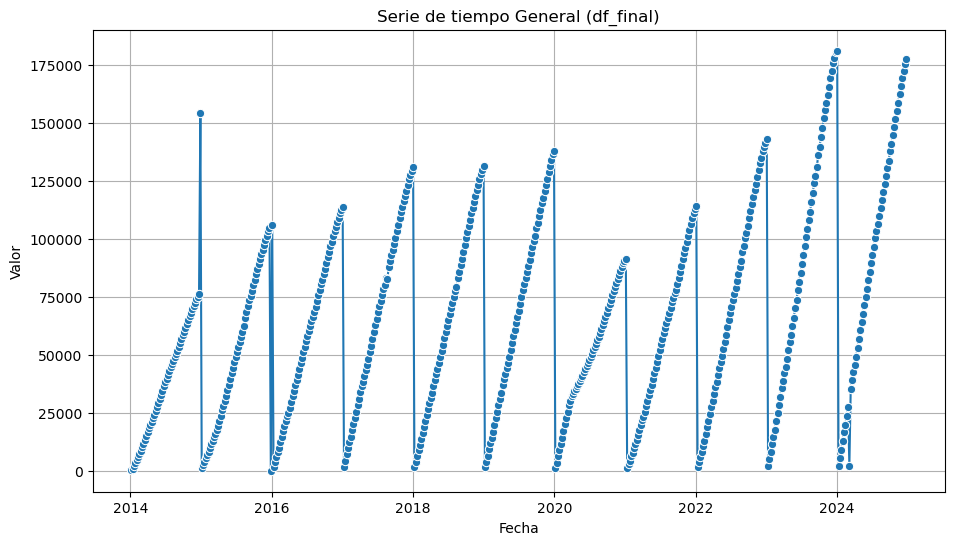

In [29]:
# Gráfica de línea con seaborn
fig = sns.lineplot(data=df_acumulado, x='Fecha', y='Valor', marker='o')
fig.set_title('Serie de tiempo General (df_final)')
fig.set_xlabel('Fecha')
fig.set_ylabel('Valor')
fig.grid(True)
fig.figure.set_size_inches(11, 6)
plt.show()

# Gráfica de línea con plotly
fig = px.line(df_acumulado, x='Fecha', y='Valor',title=f"Serie de tiempo General (df_final)",
              hover_data={'Semana': True, 'Fecha': True},
              markers=True,
            )
# Ajustar el tamaño de los marcadores
fig.update_traces(marker=dict(size=4))
# # fig.update_layout(height=800)
fig.show()


#### Datos Base

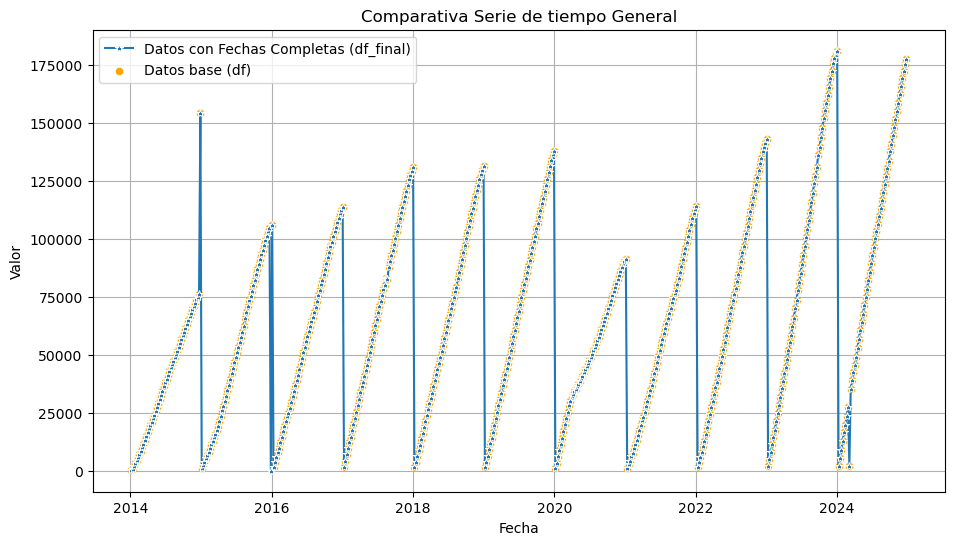

In [30]:
# Gráfica de línea con seaborn  - Comparativa entre df_final y df (base)
fig = sns.lineplot(data=df_acumulado, x='Fecha', y='Valor', marker='*', label='Datos con Fechas Completas (df_final)')
fig = sns.scatterplot(data=df_acumulado_base, x='Fecha', y='Valor', color='orange', label='Datos base (df)')
fig.set_title('Comparativa Serie de tiempo General')
fig.set_xlabel('Fecha')
fig.set_ylabel('Valor')
fig.legend()
fig.grid(True)
fig.figure.set_size_inches(11, 6)
plt.show()

# Gráfica de línea con plotly - Comparativa entre df_final y df (base)
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df_acumulado['Fecha'],
    y= df_acumulado['Valor'],
    name= 'Datos con Fechas Completas',
    mode='lines+markers',
    customdata=df_acumulado['Semana'],
    hovertemplate=(
        '<b>Fecha</b>: %{x}<br>' +
        '<b>Valor Acumulado</b>: %{y}<br>' +
        '<b>Semana</b>: %{customdata}<br>' + # Accede a la primera columna de customdata
        '<extra></extra>' # Oculta la información secundaria del trace
    )
))
fig.add_trace(go.Scatter(
    x = df_acumulado_base['Fecha'],
    y= df_acumulado_base['Valor'],
    name= 'Datos base',
    mode='markers',
    customdata=df_acumulado_base['Semana'],
    hovertemplate=(
        '<b>Fecha</b>: %{x}<br>' +
        '<b>Valor Acumulado</b>: %{y}<br>' +
        '<b>Semana</b>: %{customdata}<br>' + # Accede a la primera columna de customdata
        '<extra></extra>' # Oculta la información secundaria del trace
    )
))
fig.update_traces(marker=dict(size=4))
fig.show()

In [31]:
filtros = (df_final['Estado']=='TOTAL') \
          & (df_final['Ax_003'] == 'Sem.')
df_general = df_final[filtros]
df_general.head()

,Fecha,Cuadro,Estado,Codigo Padecimiento,Ax_003,Año,Semana,Ax_001,Ax_002,Valor,Padecimiento
55104,2014-01-06,CUADRO 17.,TOTAL,F32,Sem.,2014,2,2014.0,0,131.0,DepresiónCIE-10ª REV.F32
55105,2014-01-13,CUADRO 17.,TOTAL,F32,Sem.,2014,3,2014.0,0,658.0,DepresiónCIE-10ª REV.F32
55106,2014-01-20,CUADRO 17.,TOTAL,F32,Sem.,2014,4,2014.0,0,933.0,DepresiónCIE-10ª REV.F32
55107,2014-01-27,CUADRO 17.,TOTAL,F32,Sem.,2014,5,2014.0,0,1023.0,DepresiónCIE-10ª REV.F32
55108,2014-02-03,CUADRO 17.,TOTAL,F32,Sem.,2014,6,2014.0,0,1151.0,DepresiónCIE-10ª REV.F32


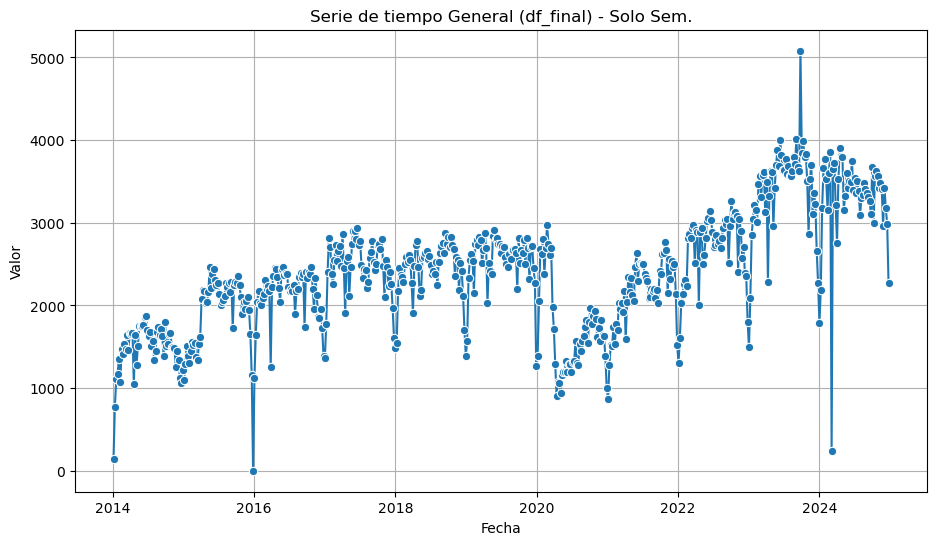

In [32]:
df_acumulado = df_general.groupby('Fecha')['Valor'].sum().reset_index()
df_acumulado['Semana'] = df_acumulado["Fecha"].dt.isocalendar().week
# display(df_acumulado.head())

# Gráfica de línea con seaborn
fig = sns.lineplot(data=df_acumulado, x='Fecha', y='Valor', marker='o')
fig.set_title('Serie de tiempo General (df_final) - Solo Sem.')
fig.grid(True)
fig.figure.set_size_inches(11, 6)
plt.show()
plt.show()

# # Gráfica de línea con plotly
fig = px.line(df_acumulado, x='Fecha', y='Valor',title=f"Serie de tiempo General (df)",
              hover_data={'Semana': True, 'Fecha': True},
              markers=True,
            )
# Ajustar el tamaño de los marcadores
fig.update_traces(marker=dict(size=4))
# # fig.update_layout(height=800)
fig.show()

In [33]:
print('Primeras 10 filas del DataFrame acumulado:')
print(tabulate(df_acumulado[:10],headers='keys',tablefmt='rounded_outline',showindex=True))

Primeras 10 filas del DataFrame acumulado:
╭────┬─────────────────────┬─────────┬──────────╮
│    │ Fecha               │   Valor │   Semana │
├────┼─────────────────────┼─────────┼──────────┤
│  0 │ 2014-01-06 00:00:00 │     146 │        2 │
│  1 │ 2014-01-13 00:00:00 │     776 │        3 │
│  2 │ 2014-01-20 00:00:00 │    1107 │        4 │
│  3 │ 2014-01-27 00:00:00 │    1173 │        5 │
│  4 │ 2014-02-03 00:00:00 │    1351 │        6 │
│  5 │ 2014-02-10 00:00:00 │    1077 │        7 │
│  6 │ 2014-02-17 00:00:00 │    1474 │        8 │
│  7 │ 2014-02-24 00:00:00 │    1411 │        9 │
│  8 │ 2014-03-03 00:00:00 │    1530 │       10 │
│  9 │ 2014-03-10 00:00:00 │    1474 │       11 │
╰────┴─────────────────────┴─────────┴──────────╯


## Descomposición de la serie en sus tres componentes: tendencia, estacionalidad y ruido

In [34]:
# Asegurarse de que la columna 'Fecha' sea el índice y que la serie sea la columna 'Valor'
ts_data = df_acumulado.set_index('Fecha')['Valor']

# Mostrar las primeras filas de la serie temporal preparada
print("Serie temporal preparada para descomposición:")
display(ts_data.head())

# Mostrar información de la serie temporal
print("\nInformación de la serie temporal:")
ts_data.info()

Serie temporal preparada para descomposición:


Fecha
2014-01-06     146.0
2014-01-13     776.0
2014-01-20    1107.0
2014-01-27    1173.0
2014-02-03    1351.0
Name: Valor, dtype: float64


Información de la serie temporal:
<class 'pandas.core.series.Series'>
DatetimeIndex: 573 entries, 2014-01-06 to 2024-12-23
Series name: Valor
Non-Null Count  Dtype  
--------------  -----  
573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


Se aplica la descomposición de la serie temporal para separar la tendencia, la estacionalidad y el residuo. Se utiliza la función `seasonal_decompose` de la librería `statsmodels`.

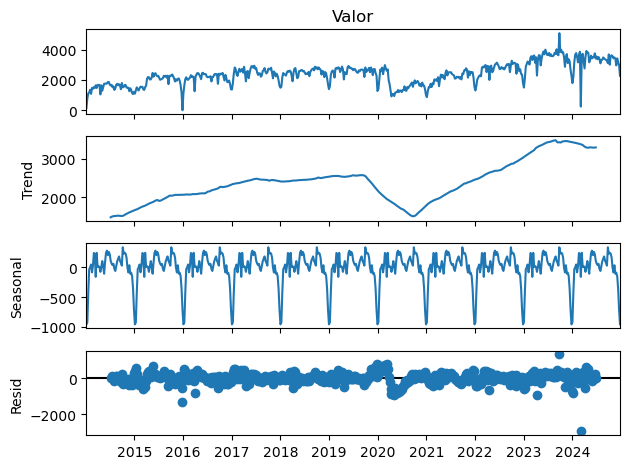

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar la descomposición aditiva
decomposition = seasonal_decompose(ts_data, model='additive')

# Mostrar los resultados de la descomposición
# Plot the decomposed time series components
fig = decomposition.plot()
plt.show()

### **Análisis de Tendencia**

La gráfica de tendencia muestra el movimiento a largo plazo de la serie de tiempo, suavizando las fluctuaciones.

* **Crecimiento Sostenido (2014-2019):** La tendencia muestra un crecimiento constante y gradual en el número de casos de depresión desde 2014 hasta 2019. Esto confirma la hipótesis de un aumento sostenido a lo largo de los años.
* **Declive y Recuperación (2020-2022):** Se observa una caída notable en la tendencia alrededor de 2020, coincidiendo con el inicio de la pandemia de COVID-19. Esto sugiere que hubo una interrupción significativa en el reporte, diagnóstico o tratamiento de los casos, lo que provocó una reducción en el número total de registros. A partir de 2021, la tendencia comienza a recuperarse y a crecer nuevamente, superando incluso los niveles de 2019.
* **Estancamiento (2024):** Al final del período (2024), la tendencia parece estabilizarse o incluso mostrar un ligero descenso. Esto puede ser debido a la incompleta de los datos para este año, o podría ser el inicio de un nuevo patrón.

### **Análisis de Estacionalidad**

La estacionalidad representa los patrones cíclicos que se repiten en intervalos de tiempo regulares.

* **Patrón Anual Fuerte:** La estacionalidad exhibe un patrón cíclico muy claro y fuerte que se repite anualmente. Se observan picos y valles consistentes en los mismos períodos de cada año. Los valles más pronunciados (valores negativos) coinciden probablemente con los meses de verano o el final del año (vacaciones), mientras que los picos (valores más cercanos a cero) coinciden con los meses de alta actividad de reporte.
* **Consistencia del Patrón:** El patrón estacional es notablemente regular a lo largo de toda la serie de tiempo, lo que sugiere que los factores que lo causan son consistentes año tras año. Este patrón es una de las características más dominantes de la serie, lo que significa que el número de casos de depresión tiene una predictibilidad regular a nivel de año.

### **Análisis de Ruido o Residuos**

Los residuos son lo que queda de la serie original después de eliminar la tendencia y la estacionalidad. Se supone que son el "ruido" aleatorio que no puede ser explicado por los otros dos componentes.

* **Variabilidad Aleatoria:** Los puntos en la gráfica de residuos parecen dispersarse de manera aleatoria alrededor de la línea cero, lo que es lo esperado. Sin embargo, se observan algunos **puntos extremos**, tanto positivos como negativos, que no pueden ser explicados ni por la tendencia ni por la estacionalidad.
* **Puntos Atípicos:** Los grandes picos y valles en los residuos representan los valores atípicos que se identificaron en los análisis previos. Estos puntos indican eventos específicos que causaron un aumento o una disminución inusualmente grande en el número de casos para un período determinado. Por ejemplo, los puntos de residuos negativos en 2020 podrían corresponder a las semanas de menor reporte durante el inicio de la pandemia, mientras que los puntos positivos en 2023-2024 podrían ser picos de casos que no se alinean con la tendencia o la estacionalidad normal.

## Pruebas de estacionaridad

La prueba ADF se usa para evaluar la **estacionariedad** de una serie. La estacionariedad es una propiedad clave que indica que las propiedades estadísticas de la serie (como la media, la varianza y la autocorrelación) son constantes a lo largo del tiempo.

La prueba ADF tiene dos hipótesis principales:

* **Hipótesis Nula ($H_0$):** La serie de tiempo **no es estacionaria** (es decir, tiene una raíz unitaria).
* **Hipótesis Alterna ($H_a$):** La serie de tiempo **es estacionaria**.

Para tomar una decisión, comparamos el **Estadístico ADF** con los **Valores Críticos** y el **Valor p** con un nivel de significancia (comúnmente 0.05 o 5%).


Por otro lado, la prueba de KPSS tiene hipótesis que son opuestas a las de la prueba ADF:

* **Hipótesis Nula ($H_0$):** La serie de tiempo **es estacionaria** (sin raíz unitaria).
* **Hipótesis Alterna ($H_a$):** La serie de tiempo **no es estacionaria** (es decir, tiene una raíz unitaria).

Para tomar una decisión, comparamos el **Estadístico KPSS** con los **Valores Críticos** y el **Valor p** con un nivel de significancia (usualmente 0.05).

In [36]:
from statsmodels.tsa.stattools import adfuller, kpss

Se aplica la prueba de Dickey-Fuller Aumentada (ADF) a la serie temporal `ts_data` para evaluar la presencia de una raíz unitaria.


In [37]:
# Realizar la prueba ADF
adf_test = adfuller(ts_data)

# Imprimir los resultados
print('Resultados de la prueba ADF:')
print(f'Estadístico ADF: {adf_test[0]}')
print(f'Valor p: {adf_test[1]}')
print('Valores críticos:')
for key, value in adf_test[4].items():
    print(f'   {key}: {value}')

Resultados de la prueba ADF:
Estadístico ADF: -2.27931493285202
Valor p: 0.17872612230014046
Valores críticos:
   1%: -3.442081300525009
   5%: -2.8667149792729596
   10%: -2.569526100127551


#### **Análisis de resultados:**

Para rechazar la hipótesis nula y concluir que la serie es estacionaria, se deben cumplir una de dos condiciones:
1.  **El Estadístico ADF es más negativo** que cualquiera de los valores críticos.
2.  **El Valor p es menor** que el nivel de significancia (0.e. 05).

En este caso:

* El Estadístico ADF (`-2.279`) **es mayor** (menos negativo) que todos los valores críticos (`-3.442`, `-2.866`, `-2.569`).
* El Valor p (`0.1787`) **es mucho mayor** que 0.05.

Basado en ambos criterios, **no se puede rechazar la hipótesis nula**. Lo que indica que la serie de tiempo de casos de depresión **no es estacionaria**. Esto confirma lo que ya observamos en el análisis de la descomposición, donde la serie de tiempo muestra una clara **tendencia** a largo plazo.

También se aplica la prueba Kwiatkowski-Phillips-Schmidt-Shin (KPSS) a la serie temporal `ts_data`. Esta prueba evalúa si una serie temporal es estacionaria alrededor de una media o una tendencia.

In [38]:
# Realizar la prueba KPSS
kpss_test = kpss(ts_data, regression='c') # 'c' for testing stationarity around a mean

# Imprimir los resultados
print('Resultados de la prueba KPSS:')
print(f'Estadístico KPSS: {kpss_test[0]}')
print(f'Valor p: {kpss_test[1]}')
print('Valores críticos:')
for key, value in kpss_test[3].items():
    print(f'   {key}: {value}')

Resultados de la prueba KPSS:
Estadístico KPSS: 1.8316163256995204
Valor p: 0.01
Valores críticos:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\steph\AppData\Local\Temp\ipykernel_28268\2461910800.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




#### **Análisis de resultados:**

Para rechazar la hipótesis nula y concluir que la serie **no es estacionaria**, se deben cumplir una de dos condiciones:

1.  **El Estadístico KPSS es mayor** que los valores críticos.
2.  **El Valor p es menor** que el nivel de significancia (e.g., 0.05).

En este caso:

* El Estadístico KPSS (`1.8316`) **es significativamente mayor** que todos los valores críticos.
* El Valor p (`0.01`) **es menor** que el nivel de significancia de 0.05.

Ambos criterios indican que **se debe rechazar la hipótesis nula**. Esto indica que la serie de tiempo de casos de depresión **no es estacionaria**. Este resultado es consistente con el de la prueba ADF y con la visualización de la tendencia en la descomposición de la serie de tiempo.

## Gráfico de Autocorrelación (ACF)

Un gráfico ACF muestra la correlación de una serie temporal con sus propios valores rezagados. Esto nos ayuda a identificar patrones de estacionalidad y la dependencia de los valores actuales con los valores pasados.

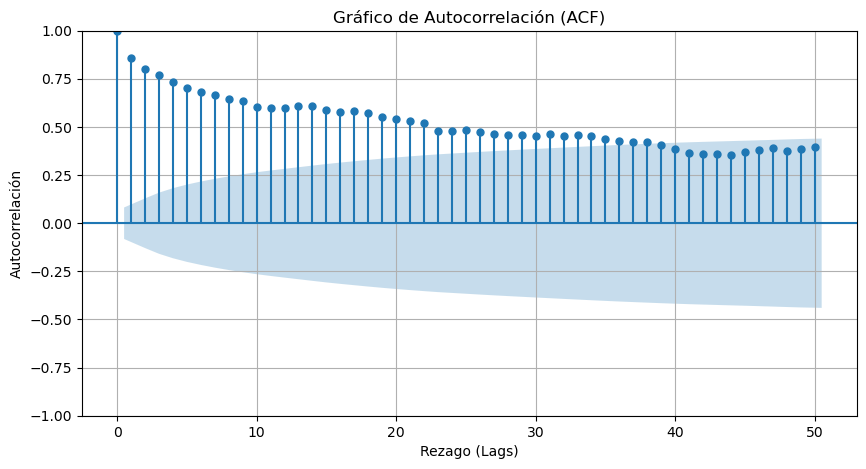

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

# Crear el gráfico ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ts_data, ax=ax, lags=50)  # Se puede ajustar número
plt.title('Gráfico de Autocorrelación (ACF)')
plt.xlabel('Rezago (Lags)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

### Interpretación del Gráfico ACF

#### **Autocorrelación Fuerte y Positiva**
El gráfico muestra una autocorrelación **muy alta y positiva** que comienza en 1.0 en el rezago 0 (correlación de la serie consigo misma) y **disminuye muy lentamente** a medida que aumentan los rezagos. Las barras verticales representan el valor de la autocorrelación para cada rezago, y la línea horizontal azul junto con el área sombreada indican el **intervalo de confianza**. Si una barra se extiende fuera del área sombreada, su correlación es **estadísticamente significativa**. En este caso, casi todas las barras están fuera del área, lo que confirma una alta significancia.

#### **Decaimiento Lento (Slow Decay)**
El decaimiento lento de la autocorrelación es la característica más importante de este gráfico. En una serie estacionaria, la autocorrelación debería caer a cero de manera rápida. La lentitud en la caída es una señal clara de que la serie de tiempo **no es estacionaria** y tiene una **tendencia**. Esto se debe a que un valor en un punto dado está fuertemente correlacionado con los valores que le preceden, lo que es la definición de una tendencia. Este resultado **confirma** los hallazgos de las pruebas ADF y KPSS, así como la visualización de la tendencia en la descomposición de la serie.

#### **Posible Estacionalidad**
Aunque la tendencia es el factor dominante, la forma de "diente de sierra" o los pequeños picos que se observan en el gráfico (por ejemplo, alrededor del rezago 52) podrían indicar la presencia de **estacionalidad**. Dado que tu serie de tiempo es semanal y un año tiene aproximadamente 52 semanas, un pico significativo en el rezago 52 (y sus múltiplos) sugeriría una correlación fuerte con el mismo punto en el tiempo del año anterior. Este patrón confirma la estacionalidad que ya identificaste en el análisis de descomposición.

## Valores atípicos usando ventanas móviles

### Selección de la serie temporal

Se filtra el DataFrame `df_final` para obtener la serie temporal de casos de Depresión a nivel nacional, diferenciado por sexo (`Ax_003` in ['H', 'M']).

In [40]:
# Filtrar para casos de Depresión (F32) a nivel nacional (Estado == 'TOTAL'), diferenciado por sexo
df_depresion_nacional = df_final[
    (df_final['Codigo Padecimiento'] == 'F32') &
    (df_final['Estado'] == 'TOTAL') &
    ((df_final['Ax_003'] == 'H') | (df_final['Ax_003'] == 'M'))
].copy()

# Asegurarse de que la columna 'Valor' sea numérica y manejar NaNs si los hay (aunque ya se hizo en el preprocesamiento)
df_depresion_nacional['Valor'] = pd.to_numeric(df_depresion_nacional['Valor'], errors='coerce').fillna(0)

# Mostrar las primeras filas del DataFrame filtrado
print("DataFrame filtrado para Depresión a nivel nacional (H y M):")
display(df_depresion_nacional.head())

# Mostrar información del DataFrame filtrado
print("\nInformación del DataFrame filtrado:")
df_depresion_nacional.info()

DataFrame filtrado para Depresión a nivel nacional (H y M):


,Fecha,Cuadro,Estado,Codigo Padecimiento,Ax_003,Año,Semana,Ax_001,Ax_002,Valor,Padecimiento
55678,2014-01-06,CUADRO 17.,TOTAL,F32,H,2014,2,2014.0,Acum.,29.0,DepresiónCIE-10ª REV.F32
55679,2014-01-13,CUADRO 17.,TOTAL,F32,H,2014,3,2014.0,Acum.,158.0,DepresiónCIE-10ª REV.F32
55680,2014-01-20,CUADRO 17.,TOTAL,F32,H,2014,4,2014.0,Acum.,351.0,DepresiónCIE-10ª REV.F32
55681,2014-01-27,CUADRO 17.,TOTAL,F32,H,2014,5,2014.0,Acum.,583.0,DepresiónCIE-10ª REV.F32
55682,2014-02-03,CUADRO 17.,TOTAL,F32,H,2014,6,2014.0,Acum.,847.0,DepresiónCIE-10ª REV.F32



Información del DataFrame filtrado:
<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 55678 to 56825
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha                1148 non-null   datetime64[ns]
 1   Cuadro               1148 non-null   object        
 2   Estado               1148 non-null   object        
 3   Codigo Padecimiento  1148 non-null   object        
 4   Ax_003               1148 non-null   object        
 5   Año                  1148 non-null   UInt32        
 6   Semana               1148 non-null   UInt32        
 7   Ax_001               1144 non-null   float64       
 8   Ax_002               1144 non-null   object        
 9   Valor                1148 non-null   float64       
 10  Padecimiento         1148 non-null   object        
dtypes: UInt32(2), datetime64[ns](1), float64(2), object(6)
memory usage: 100.9+ KB


### Definición del tamaño de la ventana móvil

El tamaño de la ventana móvil es un parámetro crucial. Un tamaño de ventana más pequeño capturará fluctuaciones más rápidas, mientras que un tamaño más grande suavizará la serie y detectará desviaciones más grandes. Para datos semanales, una ventana de 4 semanas podría ser un buen punto de partida para capturar tendencias mensuales.

In [41]:
# Definir el tamaño de la ventana móvil (en número de semanas)
window_size = 3
print(f"Tamaño de la ventana móvil definido como: {window_size} semanas")

Tamaño de la ventana móvil definido como: 3 semanas


Se calcula la media móvil y la desviación estándar móvil para la serie temporal de casos de depresión utilizando el tamaño de ventana definido. Estas estadísticas ayudan a identificar valores que se desvían significativamente de la norma local.

In [42]:
# Asegurarse de que el DataFrame está ordenado por fecha para los cálculos de ventana móvil
df_depresion_nacional = df_depresion_nacional.sort_values(by='Fecha')

# Agrupar por fecha y sumar los valores para obtener una serie temporal única
df_depresion_nacional_acumulado = df_depresion_nacional.groupby('Fecha')['Valor'].sum().reset_index()

# Calcular la media móvil y la desviación estándar móvil
df_depresion_nacional_acumulado['Rolling_Mean'] = df_depresion_nacional_acumulado['Valor'].rolling(window=window_size, min_periods=window_size -1).mean()
df_depresion_nacional_acumulado['Rolling_Std'] = df_depresion_nacional_acumulado['Valor'].rolling(window=window_size, min_periods=window_size-1).std()

# Mostrar las primeras filas con las nuevas columnas
print("DataFrame con media móvil y desviación estándar móvil:")
display(df_depresion_nacional_acumulado.head())

DataFrame con media móvil y desviación estándar móvil:


,Fecha,Valor,Rolling_Mean,Rolling_Std
0,2014-01-06,131.0,NaN,NaN
1,2014-01-13,790.0,460.500000,465.983369
2,2014-01-20,1726.0,882.333333,801.498804
3,2014-01-27,2761.0,1759.000000,985.914296
4,2014-02-03,3985.0,2824.000000,1130.816961


Se define un umbral para identificar los valores que se desvían significativamente de la media móvil. Un enfoque común es usar un múltiplo de la desviación estándar (por ejemplo, 2 o 3 desviaciones estándar). En este caso se utilizan 1.1

In [43]:
# Definir el umbral para la detección de valores atípicos (número de desviaciones estándar)
threshold = 1.143

# Calcular los límites superior e inferior para la detección de valores atípicos
df_depresion_nacional_acumulado['Upper_Bound'] = df_depresion_nacional_acumulado['Rolling_Mean'] + (df_depresion_nacional_acumulado['Rolling_Std'] * threshold)
df_depresion_nacional_acumulado['Lower_Bound'] = df_depresion_nacional_acumulado['Rolling_Mean'] - (df_depresion_nacional_acumulado['Rolling_Std'] * threshold)

# Identificar los valores atípicos
df_depresion_nacional_acumulado['Is_Outlier'] = (df_depresion_nacional_acumulado['Valor'] > df_depresion_nacional_acumulado['Upper_Bound']) | (df_depresion_nacional_acumulado['Valor'] < df_depresion_nacional_acumulado['Lower_Bound'])

# Filtrar para mostrar solo los valores atípicos
outliers = df_depresion_nacional_acumulado[df_depresion_nacional_acumulado['Is_Outlier']]

print(f"Valores atípicos identificados (usando un umbral de {threshold} desviaciones estándar): ({len(outliers)})")
display(outliers)

Valores atípicos identificados (usando un umbral de 1.143 desviaciones estándar): (13)


,Fecha,Valor,Rolling_Mean,Rolling_Std,Upper_Bound,Lower_Bound,Is_Outlier
51,2014-12-29,140226.0,92517.000000,41320.497008,139746.328080,45287.671920,True
103,2015-12-28,0.0,63042.000000,54599.215635,125448.903471,635.096529,True
123,2016-05-16,903.0,23128.000000,19275.302877,45159.671188,1096.328812,True
157,2017-01-09,1617.0,68867.666667,58244.685606,135441.342314,2293.991019,True
190,2017-08-28,80450.0,77393.666667,2661.369259,80435.611730,74351.721604,True
209,2018-01-08,1384.0,80167.000000,68232.475164,158156.719112,2177.280888,True
261,2019-01-07,1416.0,80201.333333,68233.518525,158192.245008,2210.421659,True
313,2020-01-06,1254.0,83847.000000,71530.156836,165605.969264,2088.030736,True
366,2021-01-11,1192.0,56936.000000,48277.478145,112117.157519,1754.842481,True
418,2022-01-10,1445.0,70702.000000,59981.438537,139260.784248,2143.215752,True


### Visualización de valores atípicos

Se grafica la serie temporal original junto con los valores atípicos identificados para visualizar su ubicación y magnitud.

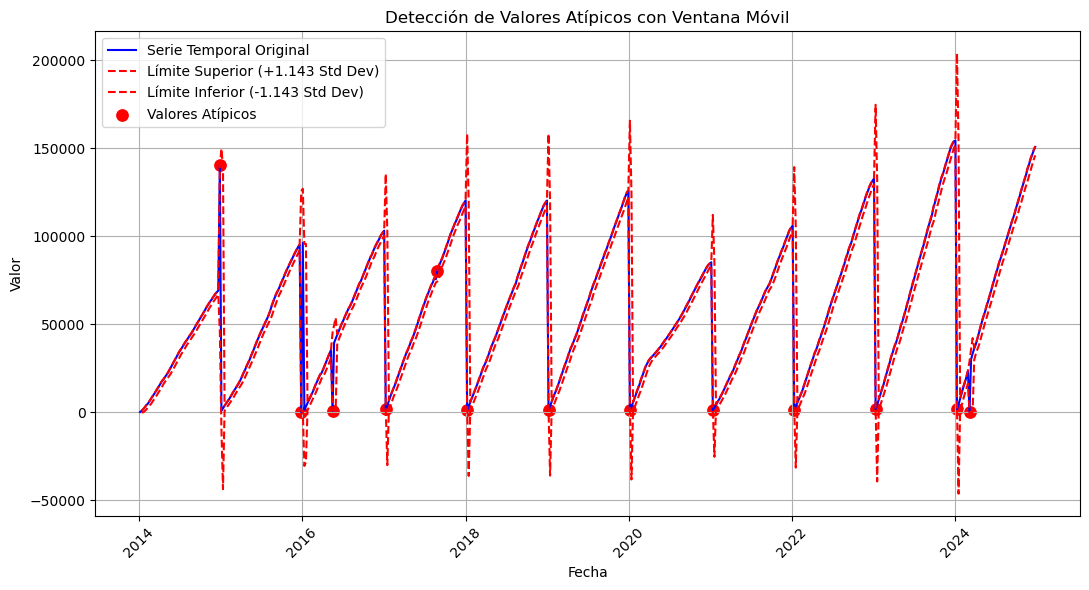

In [44]:

# Graficar la serie temporal original junto con los límites y los valores atípicos con seaborn
plt.figure(figsize=(11, 6))

# Graficar la serie temporal original
sns.lineplot(data=df_depresion_nacional_acumulado, x='Fecha', y='Valor', label='Serie Temporal Original', color='blue')

# Graficar los límites superior e inferior
sns.lineplot(data=df_depresion_nacional_acumulado, x='Fecha', y='Upper_Bound', label=f'Límite Superior (+{threshold} Std Dev)', color='red', linestyle='--')
sns.lineplot(data=df_depresion_nacional_acumulado, x='Fecha', y='Lower_Bound', label=f'Límite Inferior (-{threshold} Std Dev)', color='red', linestyle='--')

# Resaltar los valores atípicos
sns.scatterplot(data=outliers, x='Fecha', y='Valor', label='Valores Atípicos', color='red', s=100)

# Configurar el título y las etiquetas
plt.title('Detección de Valores Atípicos con Ventana Móvil')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Mostrar el gráfico
plt.show()

# # Graficar la serie temporal original junto con los límites y los valores atípicos con Plotly
fig = go.Figure()

# Agregar la serie temporal original
fig.add_trace(go.Scattergl(
    x=df_depresion_nacional_acumulado['Fecha'],
    y=df_depresion_nacional_acumulado['Valor'],
    mode='lines',
    name='Serie Temporal Original',
    line=dict(color='blue', width=1)
))

# Agregar los límites superior e inferior
fig.add_trace(go.Scattergl(
    x=df_depresion_nacional_acumulado['Fecha'],
    y=df_depresion_nacional_acumulado['Upper_Bound'],
    mode='lines',
    name=f'Límite Superior (+{threshold} Std Dev)',
    line=dict(color='red', dash='dot', width=1),
    opacity=0.7
))

fig.add_trace(go.Scattergl(
    x=df_depresion_nacional_acumulado['Fecha'],
    y=df_depresion_nacional_acumulado['Lower_Bound'],
    mode='lines',
    name=f'Límite Inferior (-{threshold} Std Dev)',
    line=dict(color='red', dash='dot', width=1),
    opacity=0.7
))

# Resaltar los valores atípicos
fig.add_trace(go.Scattergl(
    x=outliers['Fecha'],
    y=outliers['Valor'],
    mode='markers',
    name='Valores Atípicos',
    marker=dict(color='red', size=8, symbol='circle')
))

# Configurar el layout del gráfico
fig.update_layout(
    title='Detección de Valores Atípicos con Ventana Móvil',
    xaxis_title='Fecha',
    yaxis_title='Valor',
    hovermode='x unified'
)

# Mostrar el gráfico
fig.show()


### Análisis de Valores Atípicos

La gráfica muestra la serie de tiempo original (en azul) y los límites de detección de valores atípicos (líneas punteadas rojas). Cualquier punto que se encuentre por encima del **límite superior** o por debajo del **límite inferior** se marca como un valor atípico (círculo rojo). Algunas observaciones se describen a continuación.

#### **Puntos Atípicos Positivos (Picos)**
* **Finales de 2015:** Se observa un pico atípico muy alto, que parece ser el primer evento de este tipo en la serie.
* **Finales de 2017:** Un pico atípico menos pronunciado, pero aún significativo, se presenta en este periodo.
* **A partir de 2023:** Varios picos atípicos se registran en los últimos años, con uno particularmente alto al final de la serie. Estos valores extremos confirman la observación de un aumento en el número de casos de depresión, no solo en la media, sino también en los valores máximos.

#### **Puntos Atípicos Negativos (Valles)**
* Se observan varios puntos atípicos por debajo de la línea inferior, especialmente en los años 2016, 2017 y 2018. Estos valores se encuentran muy cerca de cero, o incluso en cero.


## Agrupaciones por período de tiempo (boxplots)

Para facilitar el análisis por períodos, extraeremos el mes y el año de la columna 'Fecha' y crearemos nuevas columnas en el DataFrame.

In [45]:
# Extraer el mes de la columna 'Fecha'
df_final['Mes'] = df_final['Fecha'].dt.month

# Mostrar las primeras filas con la nueva columna
print("DataFrame con columna 'Mes' añadida:")
display(df_final.head())

DataFrame con columna 'Mes' añadida:


,Fecha,Cuadro,Estado,Codigo Padecimiento,Ax_003,Año,Semana,Ax_001,Ax_002,Valor,Padecimiento,Mes
0,2014-01-06,CUADRO 17.,Aguascalientes,F32,Sem.,2014,2,2014.0,0,1.0,DepresiónCIE-10ª REV.F32,1
1,2014-01-13,CUADRO 17.,Aguascalientes,F32,Sem.,2014,3,2014.0,0,2.0,DepresiónCIE-10ª REV.F32,1
2,2014-01-20,CUADRO 17.,Aguascalientes,F32,Sem.,2014,4,2014.0,0,1.0,DepresiónCIE-10ª REV.F32,1
3,2014-01-27,CUADRO 17.,Aguascalientes,F32,Sem.,2014,5,2014.0,0,1.0,DepresiónCIE-10ª REV.F32,1
4,2014-02-03,CUADRO 17.,Aguascalientes,F32,Sem.,2014,6,2014.0,0,2.0,DepresiónCIE-10ª REV.F32,2


Se agrupa el DataFrame por mes. 
Se crean boxplots para visualizar la distribución de los valores en cada mes. 
Esto ayuda a entender la variabilidad mensual y a identificar posibles patrones estacionales.

Estadísticas descriptivas por mes:


,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
1,219.0,439.063927,776.469489,0.0,19.00,62.0,168.00,3256.0
2,199.0,536.361809,916.349212,0.0,30.00,62.0,183.00,3315.0
3,202.0,553.658416,923.961618,0.0,38.25,68.0,187.75,3203.0
4,213.0,528.253521,916.087148,0.0,32.00,71.0,184.00,3308.0
5,219.0,550.223744,934.909739,1.0,36.00,70.0,179.00,3287.0
6,205.0,587.165854,987.378730,0.0,40.00,76.0,183.00,3399.0
7,227.0,539.308370,931.032827,0.0,37.00,68.0,168.50,3203.0
8,211.0,564.635071,929.310412,0.0,38.00,73.0,206.00,3154.0
9,213.0,563.708920,965.910900,0.0,38.00,75.0,187.00,4340.0


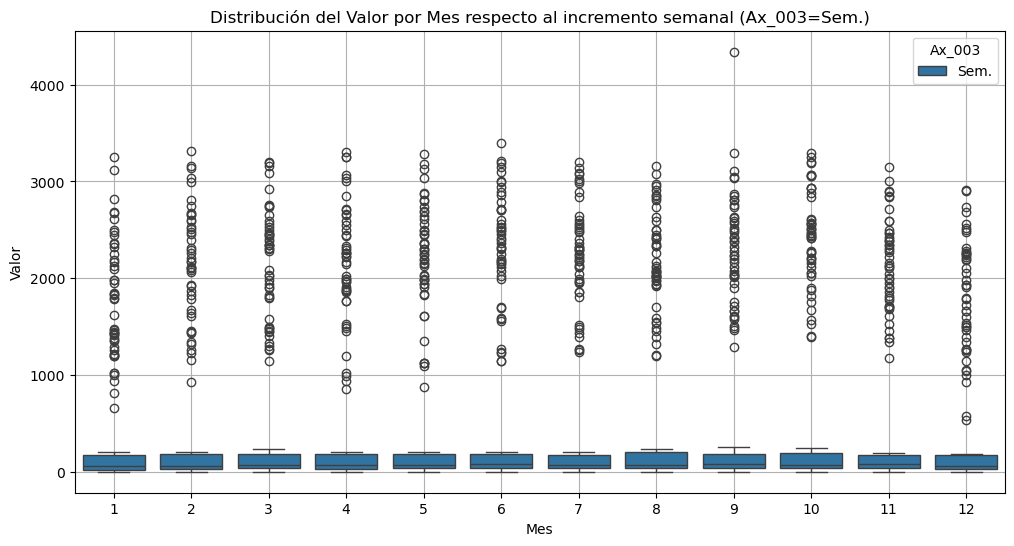

In [46]:
# df_filtrado = df_final[(df_final['Estado']!='TOTAL') & ((df_final['Ax_003']=='H') | (df_final['Ax_003']=='M'))] 
df_filtrado = df_final[(df_final['Estado']=='TOTAL') & ((df_final['Ax_003']=='Sem.') )]
# Agrupar por mes y calcular estadísticas descriptivas
monthly_stats = df_filtrado.groupby(['Mes'])['Valor'].describe()
print("Estadísticas descriptivas por mes:")
display(monthly_stats)

# Crear un boxplot interactivo para visualizar la distribución por mes con seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='Mes', y='Valor',hue='Ax_003')
plt.title(f'Distribución del Valor por Mes respecto al incremento semanal (Ax_003=Sem.)')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.grid(True)
plt.show()
# # Crear un boxplot interactivo para visualizar la distribución por mes con plotly
fig = px.box(df_filtrado, x='Mes', y='Valor',
             title='Distribución del Valor por Mes',
             labels={'Mes': 'Mes', 'Valor': 'Valor'},
             hover_data={'Semana': True,},
             category_orders={"Mes": sorted(df_filtrado['Mes'].unique())}) # Asegurar el orden correcto de los meses

fig.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1)) # Asegurar que se muestren todos los meses
fig.show()

### Análisis de la Distribución del Valor (Casos de Depresión) por Mes

Este análisis nos muestra el comportamiento de los casos de depresión registrados en incrementos semanales, en lugar del total acumulado. Esto permite obtener una visión más clara del ritmo al que se presentan nuevos casos cada mes.

* **Sin una Tendencia Clara:** no se muestra una clara tendencia ascendente a lo largo del año. La media y la mediana de los casos semanales se mantienen relativamente estables, fluctuando entre los **500 y 600** casos, sin un patrón de aumento o disminución significativo de enero a diciembre. 
* **Distribución Simétrica y Consistente:** Las cajas de los boxplots son de tamaño similar y están ubicadas a la misma altura en todos los meses. Esto indica que la mayoría de los casos semanales se concentran en un rango similar, con una mediana alrededor de **60-80** casos en la mayoría de los meses. La variabilidad también se mantiene constante.
* **Valores Atípicos (Picos):** El aspecto más prominente de la gráfica son los **puntos atípicos** que se extienden muy por encima de las cajas, alcanzando valores de hasta 3,000 o 4,000 casos. Estos picos son consistentes en todos los meses y nos recuerdan que, aunque el incremento promedio es estable, hay semanas específicas con un aumento extraordinario de casos. . Estos picos podrían reflejar eventos de reporte masivo o la recolección de datos pendientes.

### Agrupación por año

Ahora se agrupa el DataFrame por año, se visualiza igualmente por medio de boxplots la distribución de los valores en cada año. Esto ayuda a entender la variabilidad anual y a identificar posibles tendencias a lo largo del tiempo.


Estadísticas descriptivas por año:


,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2014,153.0,492.549020,624.052450,4.0,41.00,106.0,1253.00,1698.0
2015,159.0,630.924528,813.198518,12.0,50.00,142.0,1448.50,2253.0
2016,156.0,713.948718,885.959154,32.0,58.50,152.5,1803.00,2268.0
2017,156.0,825.589744,1042.531496,33.0,59.75,148.5,2140.00,2703.0
2018,156.0,817.070513,1027.421653,33.0,58.75,152.5,2160.00,2628.0
2019,156.0,856.025641,1065.603333,38.0,71.00,162.5,2268.75,2650.0
2020,159.0,562.106918,769.491428,9.0,36.00,71.0,1215.50,2744.0
2021,156.0,717.032051,931.213273,12.0,44.00,117.5,1889.75,2575.0
2022,156.0,898.173077,1163.446771,27.0,53.00,144.5,2313.25,3061.0


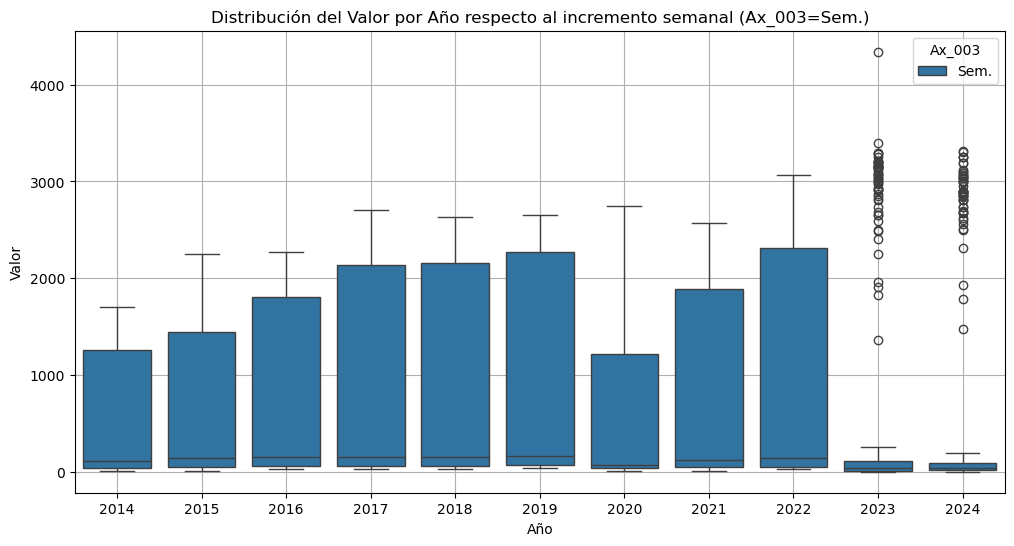

In [47]:
# Agrupar por año y calcular estadísticas descriptivas
df_filtrado = df_final[(df_final['Estado']=='TOTAL') & ((df_final['Ax_003']=='Sem.') )]

yearly_stats = df_filtrado.groupby(['Año'])['Valor'].describe()
print("\nEstadísticas descriptivas por año:")
display(yearly_stats)

# Crear un boxplot interactivo para visualizar la distribución por año con seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtrado, x='Año', y='Valor',hue='Ax_003')
plt.title(f'Distribución del Valor por Año respecto al incremento semanal (Ax_003=Sem.)')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.grid(True)
plt.show()
# Crear un boxplot interactivo con Plotly para visualizar la distribución por año
fig = px.box(df_filtrado, x='Año', y='Valor',
             title='Distribución del Valor por Año',
             labels={'Año': 'Año', 'Valor': 'Valor'},
             hover_data={'Semana': True,},
             category_orders={"Año": sorted(df_final['Año'].unique())}) # Asegurar el orden correcto de los años

fig.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1)) # Asegurar que se muestren todos los años
fig.show()

### Análisis de la Distribución del Valor (Casos de Depresión) por Año

Este análisis nos muestra el ritmo al que se añaden nuevos casos de depresión cada año. Al observar los incrementos semanales, podemos ver la verdadera velocidad de reporte.

* **Tendencia General:** De **2014 a 2019**, hay una tendencia de crecimiento constante en el número promedio de casos semanales (`mean`), lo que sugiere un aumento progresivo en la detección o el reporte de la depresión. Por ejemplo, el promedio semanal de 2014 era de **492.5**, y para 2019 ya era de **856.0**. Esto muestra una tendencia de crecimiento constante.
* Durante la pandemia, el ritmo de crecimiento se interrumpe abruptamente. El valor medio semanal cae de **856** en 2019 a **562** en 2020. Aunque el promedio se recupera en 2021 y alcanza un nuevo pico en 2022 de casi **900**, esta caída inicial resalta el impacto de la pandemia en los sistemas de salud y el reporte de casos.
* A partir de **2023**, los datos son inusualmente bajos. El `count` de observaciones cae de **156** a **564**, lo que es una diferencia enorme. Esto se debe a que tu serie de tiempo tiene más de un registro por semana, y los datos no están agregados. A pesar de los promedios bajos de `315` y `302`, los valores máximos (`max`) son increíblemente altos, lo que sugiere que hubo semanas con un reporte masivo, pero el total de datos es incompleto para esos años.